In [77]:
import requests
import pandas as pd
import html5lib
from lxml import html
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime
import numpy as np
import matplotlib.dates as mdates
import altair as alt
import datetime as dt
 
%matplotlib inline

In [108]:
all_df = pd.DataFrame(columns=["CaseNo", "S&C", "initialHearing", "firstJudgment"])
event_dict = {}
for i in range(1, 84):
    file = open("case_html/" + str(i) + "case.csv", "r")
    content = file.read()
    soup = BeautifulSoup(content, 'html5lib')
    details = soup.find("span", {"class": "caseNo"})
    if details == None:
        continue
    caseNo = details.text.strip()
    
    record = soup.find("table", {"class": "group-colored dataTable"})
    records = record.findAll('tr')
    number = len(records)
    
    dict = {"CaseNo": [],
       "Date": [],
       "Event": []}

    df = pd.DataFrame(dict)
    sc = "sc"
    initial_hearing = "ih"
    first_judgment = "fj"
    for i in range(0, number):
        r = records[i]
        if(r.find('td', {"class": "date"}) == None):
            continue
        date = r.find('td', {"class": "date"}).text
        event = r.findAll('td')[1].text
        if event in ["Filing fee paid", "Summons and complaint"]:
            #print("S&C" + date)
            sc = date
        elif event == "Notice of hearing":
            #print("initial hearing" + date)
            initial_hearing = date
        elif event in ["Notice of entry of judgment", "Default judgment", "Writ of restitution", "Judgment after court trial"]:
            #print("judgment" + date)
            first_judgment = date
        df.loc[len(df.index)] = [caseNo, date, event]
    
    all_df.loc[len(all_df.index)] = [caseNo, sc, initial_hearing, first_judgment]
    
#     events = df['Event'].tolist()
#     rep = set()
#     set_events = set(events)
#     if "Notice of hearing" not in set_events:
#         continue
#     for e in events:
#         if e in rep:
#             continue
#         if e in event_dict:
#             event_dict[e] += 1
#         else:
#             event_dict[e] = 1
#         rep.add(e)
all_df

,CaseNo,S&C,initialHearing,firstJudgment
0,2021SC000268,04-22-2021,05-11-2021,06-18-2021
1,2020SC001080,11-02-2020,11-17-2020,04-20-2021
2,2021SC000148,05-03-2021,05-03-2021,06-16-2021
3,2021SC000068,06-04-2021,ih,06-29-2021
4,2021SC001257,05-04-2021,ih,05-24-2021
5,2021SC000342,04-05-2021,05-05-2021,05-05-2021
6,2021SC000423,02-01-2021,02-01-2021,06-17-2021
7,2021SC000328,06-08-2021,ih,06-24-2021
8,2021SC001213,04-20-2021,04-22-2021,05-10-2021
9,2021SC000664,04-20-2021,04-29-2021,05-12-2021


In [47]:
file = open("case_html/" + str(1) + "case.csv", "r")
content = file.read()
soup = BeautifulSoup(content, 'html5lib')
details = soup.find("span", {"class": "caseNo"})
caseNo = details.text.strip()
caseNo

'2021SC000268'

In [3]:
# and tag['class'] == "group-colored dataTable"
# record = soup.find(lambda tag: tag.name == 'table' and tag.has_attr('class'))

In [45]:
record = soup.find("table", {"class": "group-colored dataTable"})
records = record.findAll('tr')
#records = record.findAll('td', {"class": "date"})
number = len(records)

In [42]:
date = df['Date'].tolist()
events = df['Event'].tolist()
events.reverse()

# Convert date strings (e.g. 06-30-2021) to datetime
dates = [datetime.strptime(d, "%m-%d-%Y") for d in date]
#dates.append(datetime.now())
dates.append(dates[-1])
dates.reverse()
dates

[datetime.datetime(2021, 4, 22, 0, 0),
 datetime.datetime(2021, 4, 22, 0, 0),
 datetime.datetime(2021, 4, 22, 0, 0),
 datetime.datetime(2021, 4, 22, 0, 0),
 datetime.datetime(2021, 4, 22, 0, 0),
 datetime.datetime(2021, 4, 22, 0, 0),
 datetime.datetime(2021, 4, 22, 0, 0),
 datetime.datetime(2021, 5, 11, 0, 0),
 datetime.datetime(2021, 5, 11, 0, 0),
 datetime.datetime(2021, 5, 27, 0, 0),
 datetime.datetime(2021, 5, 27, 0, 0),
 datetime.datetime(2021, 5, 27, 0, 0),
 datetime.datetime(2021, 5, 27, 0, 0),
 datetime.datetime(2021, 5, 27, 0, 0),
 datetime.datetime(2021, 6, 2, 0, 0),
 datetime.datetime(2021, 6, 2, 0, 0),
 datetime.datetime(2021, 6, 2, 0, 0),
 datetime.datetime(2021, 6, 18, 0, 0),
 datetime.datetime(2021, 6, 18, 0, 0),
 datetime.datetime(2021, 6, 18, 0, 0),
 datetime.datetime(2021, 6, 18, 0, 0),
 datetime.datetime(2021, 6, 18, 0, 0),
 datetime.datetime(2021, 6, 18, 0, 0),
 datetime.datetime(2021, 6, 18, 0, 0),
 datetime.datetime(2021, 6, 18, 0, 0),
 datetime.datetime(2021, 6, 

In [102]:
data = pd.DataFrame()
data['from'] = dates[:-1]
data['to'] = dates[1:] 
data['event'] = events

ValueError: Length of values does not match length of index

In [220]:
#pd.set_option('display.max_rows', 82)
all_df = all_df[all_df["initialHearing"] != "ih"]
all_df

,CaseNo,S&C,initialHearing,firstJudgment
0,2021SC000268,04-22-2021,05-11-2021,06-18-2021
1,2020SC001080,11-02-2020,11-17-2020,04-20-2021
2,2021SC000148,05-03-2021,05-03-2021,06-16-2021
5,2021SC000342,04-05-2021,05-05-2021,05-05-2021
6,2021SC000423,02-01-2021,02-01-2021,06-17-2021
8,2021SC001213,04-20-2021,04-22-2021,05-10-2021
9,2021SC000664,04-20-2021,04-29-2021,05-12-2021
11,2021SC000662,03-05-2021,04-12-2021,06-07-2021
13,2021SC000958,04-21-2021,04-26-2021,05-17-2021
14,2021SC001272,01-22-2021,01-27-2021,05-18-2021


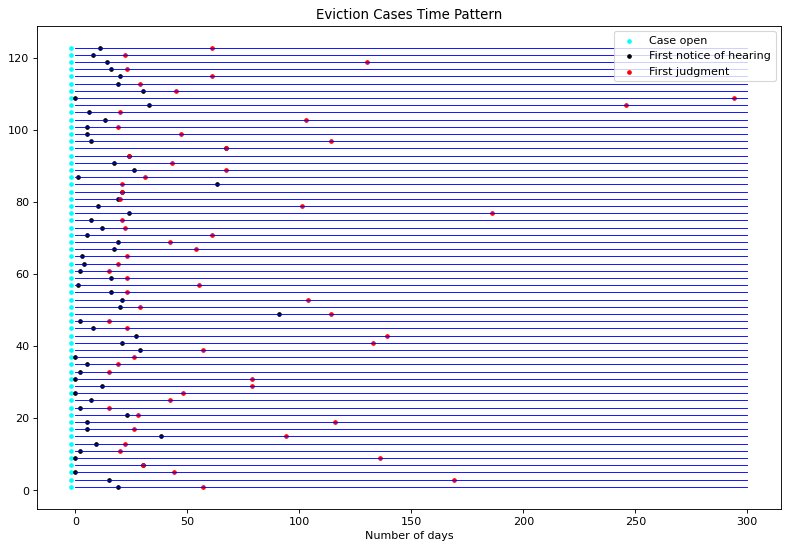

In [219]:
from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=80)
names = all_df.columns[1:]
names = names.tolist()

dates = all_df.iloc[0, 1:]
dates = dates.tolist()
dates = [datetime.strptime(d, "%m-%d-%Y") for d in dates]

x1 = (dates[1] - dates[0]).days
x2 = (dates[2] - dates[0]).days
plt.plot([0,300], [1, 1], color="blue", lw=0.8)
plt.scatter([-2], [1], color="cyan", s=10, label="Case open")
plt.scatter([x1], [1], color="black", s=10, label="First notice of hearing")
plt.scatter([x2], [1], color="red", s=10, label="First judgment")
    
for i in range(1, 62):
    dates = all_df.iloc[i, 1:]
    dates = dates.tolist()
    dates = [datetime.strptime(d, "%m-%d-%Y") for d in dates]

    x1 = (dates[1] - dates[0]).days
    x2 = (dates[2] - dates[0]).days
    plt.plot([0,300], [2*i+1, 2*i+1], color="blue", lw=0.8)
    plt.scatter([-2], [2*i+1], color="cyan", s=10)
    plt.scatter([x1], [2*i+1], color="black", s=10)
    plt.scatter([x2], [2*i+1], color="red", s=10)

plt.legend(loc="upper right")
plt.xlabel("Number of days")
plt.title("Eviction Cases Time Pattern")
plt.show()

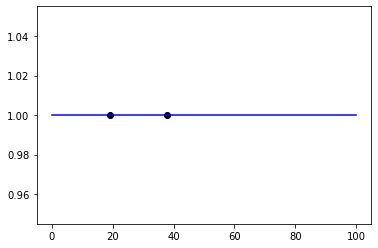

In [170]:
dates = all_df.iloc[0, 1:]
dates = dates.tolist()
dates = [datetime.strptime(d, "%m-%d-%Y") for d in dates]

x1 = (dates[1] - dates[0]).days
x2 = (dates[2] - dates[1]).days
plt.plot([0,100], [1, 1], color="blue")
plt.scatter([x1, x2], [1, 1], color="black")

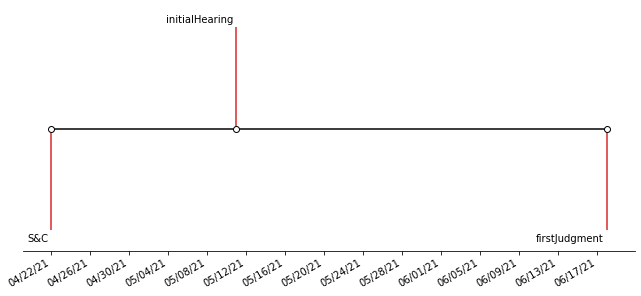

In [145]:
# Choose some nice levels
levels = np.tile([-0.2, 0.2, -0.2],
                 int(np.ceil(3/6)))[:3]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
#ax.set(title="Matplotlib release dates")

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 4 month intervals
ax.xaxis.set_major_locator(mdates.DayLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%D"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.margins(y=0.1)
plt.show()